<a href="https://colab.research.google.com/github/Tyriek-cloud/Individual-Projects/blob/main/StatsModel_Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **StatsModel Regression Analysis: Relationship Between NYC Boroughs and Persons Injured in Car Crashes**

This an analysis to attempt to understand if vehicle presence within any of the NYC Boroughs has a significant, predictive relationship with persons injured in car crashes. This study was informed by the below methodology:

Theoretical Background: Anecdotal evidence (friends and family) that some boroughs have higher levels of car crashes than others. therefore, some people believe that borough location could be a predictor of how many people are injured in car crashes.

Alternative Hypothesis: There is a significant, predictive relationship between boroughs in which car crashes occurred and counts of injuries in car crashes.

Null Hypothesis: There is no significant, predictive relationship between boroughs in which car crashes occurred and counts of injuries in car crashes. 

Independent Variable: New York City Boroughs (borough).

Dependent Variable: Persons injured in car crashes (number_of_persons_injured).

Statistical Methodology: Ordinary Least Squares Regression using the StatsModel Library in the latest version of Python.

In [ ]:
# Importing pandas and defining the data frame before previewing results
import pandas as pd 

df = pd.read_json("https://data.cityofnewyork.us/resource/h9gi-nx95.json")
df.tail()

,crash_date,crash_time,on_street_name,off_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,...,latitude,longitude,location,cross_street_name,contributing_factor_vehicle_3,vehicle_type_code_3,contributing_factor_vehicle_4,vehicle_type_code_4,contributing_factor_vehicle_5,vehicle_type_code_5
995,2021-04-14T00:00:00.000,2023-03-24 12:47:00,HENDRIX STREET,ATLANTIC AVENUE,2,0,0,0,0,0,...,40.676594,-73.89038,"{'latitude': '40.676594', 'longitude': '-73.89...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,2021-04-16T00:00:00.000,2023-03-24 14:30:00,EAST 64 STREET,NaN,0,0,0,0,0,0,...,40.764680,-73.96430,"{'latitude': '40.76468', 'longitude': '-73.964...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,2021-04-15T00:00:00.000,2023-03-24 00:00:00,WEST 155 STREET,BROADWAY,3,0,0,0,0,0,...,40.832764,-73.94583,"{'latitude': '40.832764', 'longitude': '-73.94...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,2021-04-14T00:00:00.000,2023-03-24 06:55:00,BROOKLYN QUEENS EXPRESSWAY,NaN,0,0,0,0,0,0,...,40.698544,-73.96236,"{'latitude': '40.698544', 'longitude': '-73.96...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
999,2021-04-14T00:00:00.000,2023-03-24 19:00:00,NaN,NaN,0,0,0,0,0,0,...,40.747536,-73.89344,"{'latitude': '40.747536', 'longitude': '-73.89...",72-24 BROADWAY,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# A variation of Statsmodel is imported and the model is defined and fitted
import statsmodels.formula.api as smf

model = smf.ols("number_of_persons_injured ~ borough", df).fit()

In [ ]:
# This is how to find the intercept of the coefficient
b0 = model.params[0]
b1 = model.params[1]

In [ ]:
# Testing and defining the first prediction
prediction1 = b0 + b1 * df["number_of_persons_injured"]
prediction1.tail()

995    0.526808
996    0.420561
997    0.579931
998    0.420561
999    0.420561
Name: number_of_persons_injured, dtype: float64

In [ ]:
# Testing and defining the second prediction; dtype should be redefined (see below)
prediction2 = model.predict(df)
prediction2.tail()

995    0.473684
996         NaN
997    0.408163
998         NaN
999    0.474026
dtype: float64

In [ ]:
# Defining error and response
df["response"] = model.predict(df)
df["error"] = df["response"] - df["number_of_persons_injured"]
df.tail()

,crash_date,crash_time,on_street_name,off_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,...,location,cross_street_name,contributing_factor_vehicle_3,vehicle_type_code_3,contributing_factor_vehicle_4,vehicle_type_code_4,contributing_factor_vehicle_5,vehicle_type_code_5,response,error
995,2021-04-14T00:00:00.000,2023-03-24 12:47:00,HENDRIX STREET,ATLANTIC AVENUE,2,0,0,0,0,0,...,"{'latitude': '40.676594', 'longitude': '-73.89...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.473684,-1.526316
996,2021-04-16T00:00:00.000,2023-03-24 14:30:00,EAST 64 STREET,NaN,0,0,0,0,0,0,...,"{'latitude': '40.76468', 'longitude': '-73.964...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,2021-04-15T00:00:00.000,2023-03-24 00:00:00,WEST 155 STREET,BROADWAY,3,0,0,0,0,0,...,"{'latitude': '40.832764', 'longitude': '-73.94...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.408163,-2.591837
998,2021-04-14T00:00:00.000,2023-03-24 06:55:00,BROOKLYN QUEENS EXPRESSWAY,NaN,0,0,0,0,0,0,...,"{'latitude': '40.698544', 'longitude': '-73.96...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999,2021-04-14T00:00:00.000,2023-03-24 19:00:00,NaN,NaN,0,0,0,0,0,0,...,"{'latitude': '40.747536', 'longitude': '-73.89...",72-24 BROADWAY,NaN,NaN,NaN,NaN,NaN,NaN,0.474026,0.474026


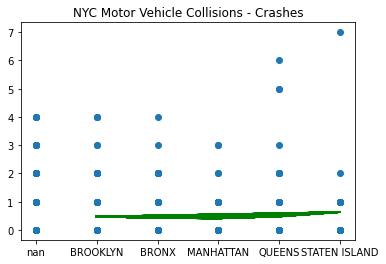

<Figure size 7200x288 with 0 Axes>

In [ ]:
# Generates the plot
import matplotlib.pyplot as plt 

df = df.astype({"number_of_persons_injured": int, "borough": str})
plt.title("NYC Motor Vehicle Collisions - Crashes")
plt.scatter(df["borough"], df["number_of_persons_injured"])
plt.plot(df["borough"], df["response"], color="g")
plt.figure().set_figwidth(100)
plt.show()

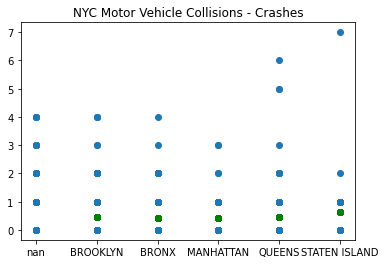

<Figure size 7200x288 with 0 Axes>

In [ ]:
# Generates the same plot with scattered values  
import matplotlib.pyplot as plt 

df = df.astype({"number_of_persons_injured": int, "borough": str})
plt.title("NYC Motor Vehicle Collisions - Crashes")
plt.scatter(df["borough"], df["number_of_persons_injured"])
plt.scatter(df["borough"], df["response"], color="g")
plt.figure().set_figwidth(100)
plt.show()

In [ ]:
# Gives important information about the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     number_of_persons_injured   R-squared:                       0.003
Model:                                   OLS   Adj. R-squared:                 -0.003
Method:                        Least Squares   F-statistic:                    0.4839
Date:                       Fri, 24 Mar 2023   Prob (F-statistic):              0.748
Time:                               15:45:19   Log-Likelihood:                -765.34
No. Observations:                        633   AIC:                             1541.
Df Residuals:                            628   BIC:                             1563.
Df Model:                                  4                                         
Covariance Type:                   nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.4206      0.079      5.345      0.000       0.266       0.575
borough[T.BROOKLYN]          0.0531      0.094      0.564      0.573      -0.132       0.238
borough[T.MANHATTAN]        -0.0124      0.114     -0.109      0.913      -0.236       0.211
borough[T.QUEENS]            0.0535      0.102      0.522      0.602      -0.148       0.255
borough[T.STATEN ISLAND]     0.2091      0.175      1.193      0.233      -0.135       0.553
==============================================================================
Omnibus:                      435.136   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5735.697
Skew:                           2.942   Prob(JB):                         0.00
Kurtosis:                      16.522   Cond. No.                         7.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

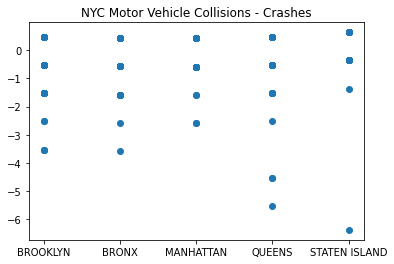

<Figure size 7200x288 with 0 Axes>

In [ ]:
# An example of an "error"
import matplotlib.pyplot as plt 

df = df.astype({"number_of_persons_injured": int, "borough": str})
plt.title("NYC Motor Vehicle Collisions - Crashes")
plt.scatter(df["borough"], df["error"])
plt.figure().set_figwidth(100)
plt.show()

The results of the study include the following: The P-values are high for all boroughs (do not reject the null). However, the low R-squared value indicates that the independent variable is not sufficient in explaining the variation in the dependent variable. Furthermore, the actual and expected values do not align well on any graphic regardless of error testing. Thus, it is likely that borough location does not have a real nor potentially significant predictive power for counts of injuries in car crashes. It is far more likely there are other, stronger predictive variables.


Ultimately, further hypotheses should be formulated. It may prove beneficial to consider other variables within the existing data.